<a href="https://colab.research.google.com/github/sanu4satyam/EDAs-using-Python/blob/main/logistic_regression_of_census_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# This study is organized as follows:

1. Research question

2. The dataset

3. Making data management decisions

    A. Exploratory Data Analysis (EDA)

* Data preprocessing (collapse the factor levels & re-coding)
* Missing data visualization
* Some obvious relationships
* Some not-so-obvious relationships

    B. Correlation Detection & Treatment
* Detecting skewed variables
* Skewed variables treatment
* Correlation detection

4. Predictive data analytics

* Creating the train and test dataset
* Fit a Logistic Regression Model
5. Conclusion

**1. Research question**

This study is driven by the question, “Predict if a person’s income is above or below 50K$/yr given certain features(both quantitative and qualitative)"

**2. The dataset**

The dataset used for the analysis is an extraction from the 1994 census data by Barry Becker and donated to the UCI Machine Learning repository. This dataset is popularly called the “Adult” data set.

In [ ]:
#Installing Packages
install.packages("VIM")
install.packages("missForest")
install.packages("ggplot2")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘nloptr’, ‘pbkrtest’, ‘lme4’, ‘car’, ‘laeken’




In [ ]:
# Import the data from a url
theUrl = "http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"
adult.data = read.table(file = theUrl, header = FALSE, sep = ",", 
                    strip.white = TRUE, stringsAsFactors = TRUE,
                    col.names=c("age","workclass","fnlwgt","education","educationnum","maritalstatus","occupation","relationship","race","sex","capitalgain","capitalloss","hoursperweek","nativecountry","income")
                    )
dim (adult.data)

[1] 32561    15

**3. Making Data management decisions**

**A. Exploratory Data Analysis (EDA)**

The function, col.names() adds the user-supplied column names to the dataset. We also see 32,561 observations in 15 variables. As always, we look at the data structure.

Immediately, a few problems can be spotted. First, there are some categorical variables where the missing levels are coded as ?; Second, there are more than 10 levels for some categorical variables.

* **Data preprocessing (collapse the factor levels & re-coding)**

We begin by collapsing the factor levels to meaningful and relevant levels. We have also re-coded the missing levels denoted in the original data as ? to misLevel.



In [ ]:
levels(adult.data$workclass) = c("misLevel","FedGov","LocGov","NeverWorked","Private","SelfEmpNotInc","SelfEmpInc","StateGov","NoPay")

levels(adult.data$education) = list(presch=c("Preschool"), primary=c("1st-4th","5th-6th"),upperprim=c("7th-8th"), highsch=c("9th","Assoc-acdm","Assoc-voc","10th"),secndrysch=c("11th","12th"), graduate=c("Bachelors","Some-college"),master=c("Masters"), phd=c("Doctorate"))

levels(adult.data$maritalstatus) = list(divorce=c("Divorced","Separated"),married=c("Married-AF-    spouse","Married-civ-spouse","Married-spouse-absent"),notmarried=c("Never-married"),widowed=c("Widowed"))

levels(adult.data$occupation) = list(misLevel=c("?"), clerical=c("Adm-clerical"), lowskillabr=c("Craft-repair","Handlers-cleaners","Machine-op-inspct","Other-service","Priv-house-    serv","Prof-specialty","Protective-serv"),highskillabr=c("Sales","Tech-support","Transport-moving","Armed-Forces"),agricultr=c("Farming-fishing"))

levels(adult.data$relationship) = list(husband=c("Husband"), wife=c("Wife"), outofamily=c("Not-in-family"),unmarried=c("Unmarried"), relative=c("Other-relative"), ownchild=c("Own-child"))

levels(adult.data$nativecountry) = list(misLevel=c("?","South"),SEAsia=c("Vietnam","Laos","Cambodia","Thailand"),Asia=c("China","India","HongKong","Iran","Philippines","Taiwan"),NorthAmerica=c("Canada","Cuba","Dominican-Republic","Guatemala","Haiti","Honduras","Jamaica","Mexico","Nicaragua","Puerto-Rico","El-Salvador","United-States"), SouthAmerica=c("Ecuador","Peru","Columbia","Trinadad&Tobago"),Europe=c("France","Germany","Greece","Holand-Netherlands","Italy","Hungary","Ireland","Poland","Portugal","Scotland","England","Yugoslavia"),PacificIslands=c("Japan","France"),Oceania=c("Outlying-US(Guam-USVI-etc)"))

Now, here is an interesting finding about this dataset. Although, the response (dependent) variable can be considered as binary but there are majority of predictors (independent) that are categorical with many levels.

According to **Agresti**, *“Categorical variables have two primary types of scales. Variables having categories without a natural ordering are called nominal. Example, mode of transportation to work (automobile, bicycle, bus, subway, walk). For nominal variables, the order of listing the categories is irrelevant. The statistical analysis does not depend on that ordering. Many categorical variables do have ordered categories. Such variables are called ordinal. Examples are size of automobile (subcompact, compact, midsize, large). Ordinal variables have ordered categories, but distances between categories are unknown. Although a person categorized as moderate is more liberal than a person categorized as conservative, no numerical value describes how much more liberal that person is. An interval variable is one that does have numerical distances between any two values.”*

*“A variable’s measurement scale determines which statistical methods are appropriate. In the measurement hierarchy, interval variables are highest, ordinal variables are next, and nominal variables are lowest. Statistical methods for variables of one type can also be used with variables at higher levels but not at lower levels. For instance, statistical methods for nominal variables can be used with ordinal variables by ignoring the ordering of categories. Methods for ordinal variables cannot, however, be used with nominal variables, since their categories have no meaningful ordering.”*

*“Nominal variables are qualitative, distinct categories differ in quality, not in quantity. Interval variables are quantitative, distinct levels have differing amounts of the characteristic of interest.”*

Therefore, we can say that all the categorical predictors in this study are nominal in nature. Also note that R will implicitly coerce the categorical variable with levels into numerical values so there is no need to explicitly do the coercion.

We check the data structure again and notice that predictors, education,occupation and native.country have 11077, 4066 and 20 missing value respectively. We show this distribution in Fig-1.


 Variables sorted by number of missings: 
      Variable        Count
     education 0.3401922545
    occupation 0.1294493412
 maritalstatus 0.0007063665
 nativecountry 0.0006142317
           age 0.0000000000
     workclass 0.0000000000
        fnlwgt 0.0000000000
  educationnum 0.0000000000
  relationship 0.0000000000
          race 0.0000000000
           sex 0.0000000000
   capitalgain 0.0000000000
   capitalloss 0.0000000000
  hoursperweek 0.0000000000
        income 0.0000000000


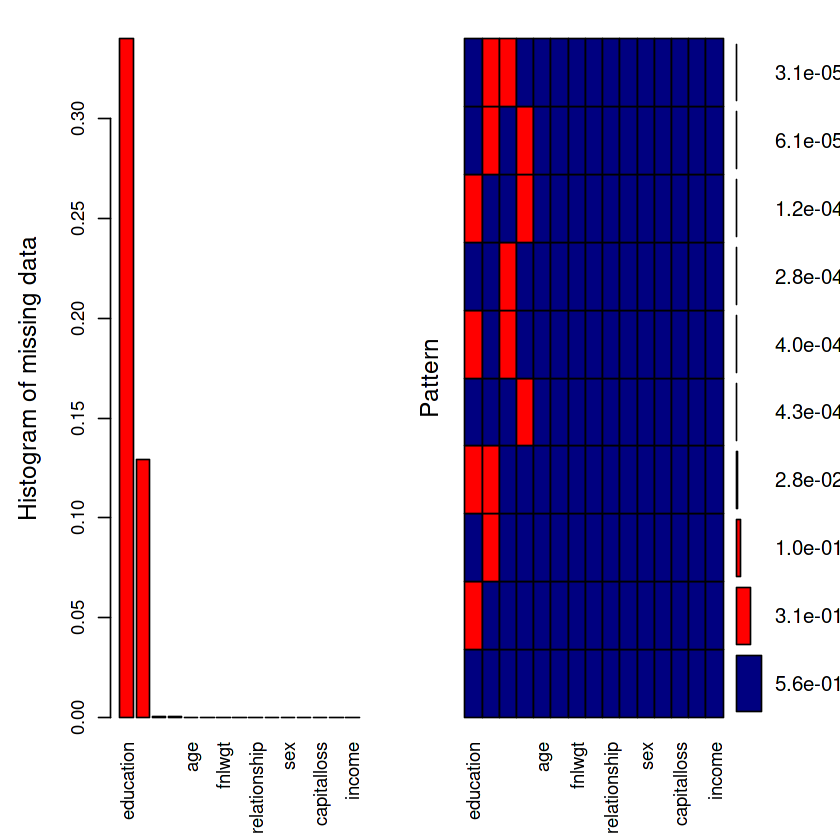

In [ ]:
library(VIM)
aggr_plot = aggr(adult.data, col=c('navyblue','red'), numbers=TRUE, sortVars=TRUE, 
              labels=names(adult.data), cex.axis=.9, gap=4, 
              ylab=c("Histogram of missing data","Pattern")
              )

    Fig-1: Missing Data Visualization

Now, some scholars suggest that missing data imputation for categorical variables introduce bias in the data while others oppose it. From, an analytical perspective we will impute the missing data and will use the missForest library. The reason why we are imputing is because some classification algorithms will fail if they are passed with data containing missing values.

In [ ]:
# Missing data treatment
library(missForest)
imputdata = missForest(adult.data) 
# check imputed values
imputdata$ximp
# assign imputed values to a data frame
adult.cmplt = imputdata$ximp

age,workclass,fnlwgt,education,educationnum,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,nativecountry,income
<int>,<fct>,<int>,<fct>,<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<int>,<int>,<int>,<fct>,<fct>
39,StateGov,77516,graduate,13,notmarried,clerical,outofamily,White,Male,2174,0,40,NorthAmerica,<=50K
50,SelfEmpInc,83311,graduate,13,married,agricultr,husband,White,Male,0,0,13,NorthAmerica,<=50K
38,Private,215646,secndrysch,9,divorce,lowskillabr,outofamily,White,Male,0,0,40,NorthAmerica,<=50K
53,Private,234721,secndrysch,7,married,lowskillabr,husband,Black,Male,0,0,40,NorthAmerica,<=50K
28,Private,338409,graduate,13,married,lowskillabr,wife,Black,Female,0,0,40,NorthAmerica,<=50K
37,Private,284582,master,14,married,lowskillabr,wife,White,Female,0,0,40,NorthAmerica,<=50K
49,Private,160187,highsch,5,married,lowskillabr,outofamily,Black,Female,0,0,16,NorthAmerica,<=50K
52,SelfEmpInc,209642,graduate,9,married,highskillabr,husband,White,Male,0,0,45,NorthAmerica,>50K
31,Private,45781,master,14,notmarried,lowskillabr,outofamily,White,Female,14084,0,50,NorthAmerica,>50K


* **Some obvious relationships**

A majority of the working adults are between 25 to 65 years of age. From Fig-2, we see that adults below 30 years earn <=50k a year while those above 43 years of age earn greater than fifty thousand dollars. This leads to the assumption that experience surely matters to earn more

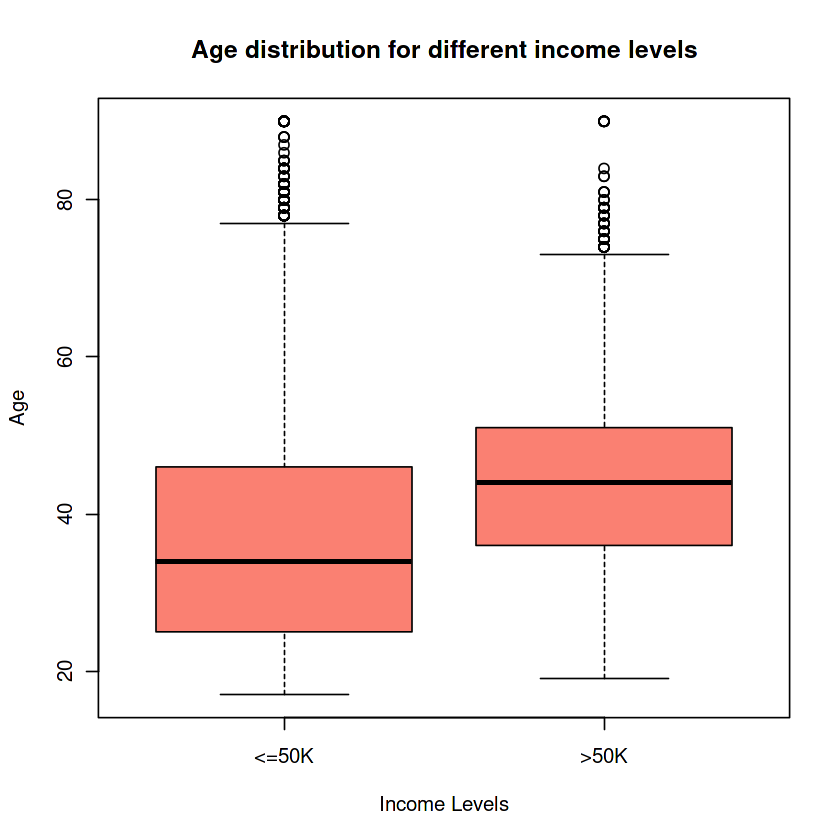

In [ ]:
boxplot (age ~ income, data = adult.cmplt, 
    main = "Age distribution for different income levels",
    xlab = "Income Levels", ylab = "Age", col = "salmon")

    Fig-2: Boxplot for age and income

Evidently, those who invest more time at workplace tend to be earning more as depicted by Fig-3.

It is also interesting to note in Fig-5, that there are roughly 10% of people with doctorate degrees working in low-skilled jobs and earning greater than 50k/year.

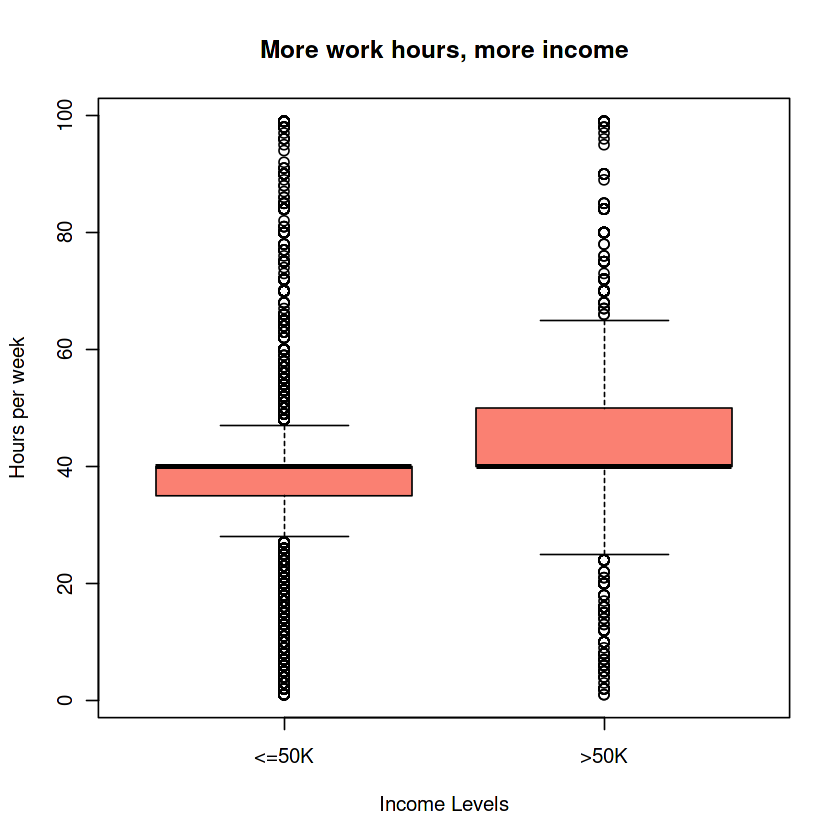

In [ ]:
boxplot (hoursperweek ~ income, data = adult.cmplt, 
    main = "More work hours, more income",
    xlab = "Income Levels", ylab = "Hours per week", col = "salmon")

    Fig-3: Boxplot for hours per week in office and income

* **Some not-so-obvious relationships**

*Question:* Does higher skill-set (sales, technical-support, transport movers, armed forces) is a guarantor to high income?

*Answer:* We explore this question by plotting occupation against income levels. As shown in Fig-4, its evident that acquiring a high skill set does not guarantee increased income. The workers with a low skill set (craft-repair, maintenance services, cleaner, private house security) earn more as compared to those with higher skill set.

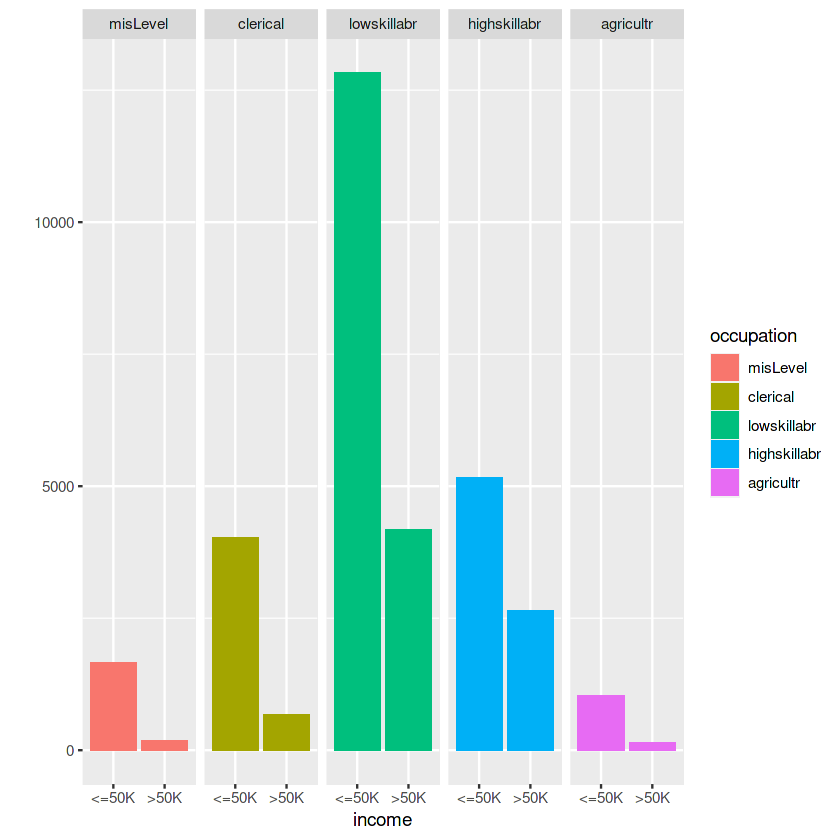

In [ ]:
library(ggplot2)
qplot(income, data = adult.cmplt, fill = occupation) + facet_grid (. ~ occupation)

    Fig-4: Q-plot for occupation and income

*Question:* Does higher education help earn more money?

*Answer:* We explore this question by plotting education against income levels. As shown in Fig-5

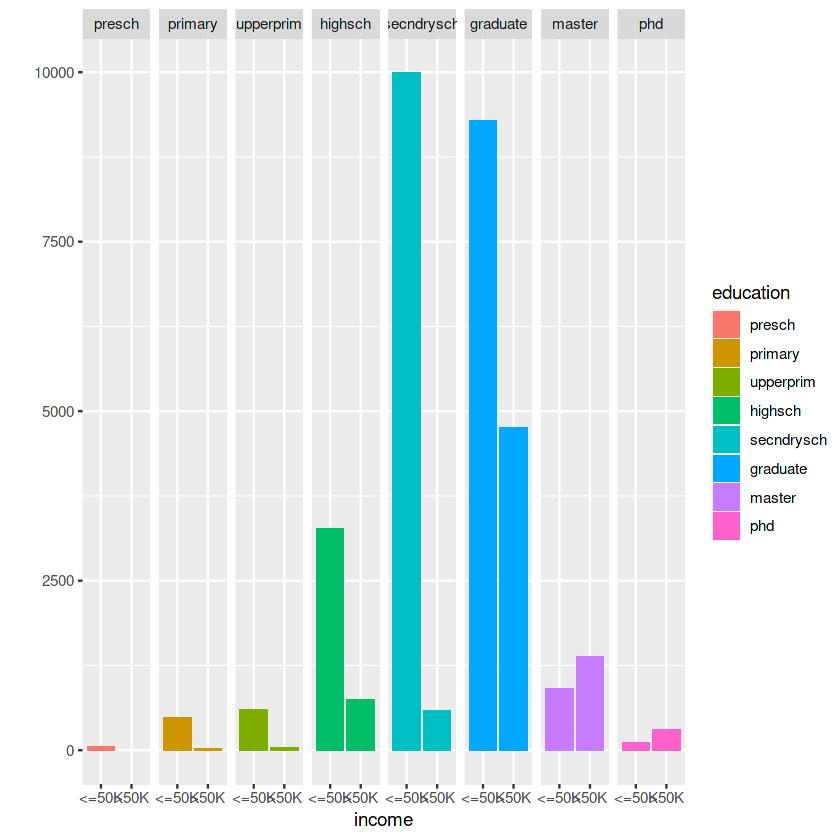

In [ ]:
qplot(income, data = adult.cmplt, fill = education) + facet_grid (. ~ education)

    Fig-5: Q-plot for education and income

From Fig-5, *we can easily make out that the number of graduates earning >50K are more than the high school or upper-primary school educated. However, we also notice that they are certainly higher in number when compared to master’s or phd degree holders. It makes sense because if for example, in a given academic session, there will be say 90% graduates, 30% masters, <10% phd degree holders. It is also unfortunate to know that there are roughly 10% of people (n=94) with doctorate degrees working in low-skilled jobs and earning less than 50k/year!*

We further drill down in this low income group bracket, shown in Fig-5, we realize that majority of them are white male married workers closely followed by the blacks and the Asia-Pacific islanders.

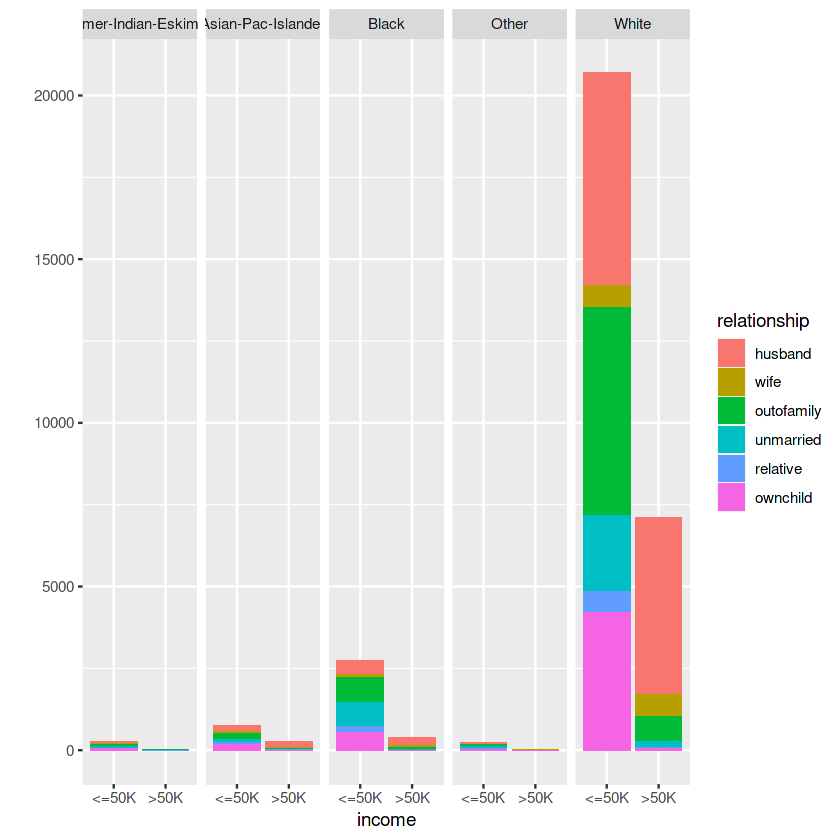

In [ ]:
qplot(income, data = adult.cmplt, fill = relationship) + facet_grid (. ~ race)

    Fig-5: Q-plot for race, relationship and income

* **Detecting skewed variables**

A variable is considered, highly skewed if its absolute value is greater than 1. A variable is considered, moderately skewed if its absolute value is greater than 0.5.

In [ ]:
skewedVars = NA
library(moments) # for skewness()
for(i in names(adult.cmplt)){
    if(is.numeric(adult.cmplt[,i])){
        if(i != "income"){
    # Enters this block if variable is non-categorical
            skewVal = skewness(adult.cmplt[,i])
            print(paste(i, skewVal, sep = ": "))
            if(abs(skewVal) > 0.5){
                skewedVars = c(skewedVars, i)
           }}}}

[1] "age: 0.558717629239857"
[1] "fnlwgt: 1.44691343514233"
[1] "educationnum: -0.311661509635468"
[1] "capitalgain: 11.9532969981943"
[1] "capitalloss: 4.59441745643977"
[1] "hoursperweek: 0.227632049774777"


We find that the predictors, *fnlwgt,capitalgain and capitalloss* are highly skewed as their absolute value is greater than 0.5.

* **Skewed variable treatment**

Post identifying the skewed variables, we proceed to treating them by taking the log transformation. But, first we rearrange/reorder the columns for simplicity;

In [ ]:
adult.cmplt = adult.cmplt[c(3,11:12,1,5,13,2,4,6:10,14:15)]
str(adult.cmplt)

'data.frame':	32561 obs. of  15 variables:
 $ fnlwgt       : int  77516 83311 215646 234721 338409 284582 160187 209642 45781 159449 ...
 $ capitalgain  : int  2174 0 0 0 0 0 0 0 14084 5178 ...
 $ capitalloss  : int  0 0 0 0 0 0 0 0 0 0 ...
 $ age          : int  39 50 38 53 28 37 49 52 31 42 ...
 $ educationnum : int  13 13 9 7 13 14 5 9 14 13 ...
 $ hoursperweek : int  40 13 40 40 40 40 16 45 50 40 ...
 $ workclass    : Factor w/ 9 levels "misLevel","FedGov",..: 8 7 5 5 5 5 5 7 5 5 ...
 $ education    : Factor w/ 8 levels "presch","primary",..: 6 6 5 5 6 7 4 6 7 6 ...
 $ maritalstatus: Factor w/ 4 levels "divorce","married",..: 3 2 1 2 2 2 2 2 3 2 ...
 $ occupation   : Factor w/ 5 levels "misLevel","clerical",..: 2 5 3 3 3 3 3 4 3 4 ...
 $ relationship : Factor w/ 6 levels "husband","wife",..: 3 1 3 1 2 2 3 1 3 1 ...
 $ race         : Factor w/ 5 levels "Amer-Indian-Eskimo",..: 5 5 5 3 3 5 3 5 5 5 ...
 $ sex          : Factor w/ 2 levels "Female","Male": 2 2 2 2 1 1 1 2 1 2 ...
 $ na

We took a log transformation. Post skewed treatment, we notice that capitalgain & capitalloss have infinite values so we removed them from subsequent analysis.

In [ ]:
adult.cmplt.norm = adult.cmplt
adult.cmplt.norm[,1:3] = log(adult.cmplt[1:3],2) # where 2 is log base 2
adult.cmplt.norm$capitalgain = NULL
adult.cmplt.norm$capitalloss = NULL

* **Correlation detection**

We now checked for variables with high correlations to each other. Correlation measures the relationship between two variables. When two variables are so highly correlated that they explain each other (to the point that one can predict the variable with the other), then we have *collinearity (or multicollinearity)* problem. Therefore, its is important to treat collinearity problem. Let us now check, if our data has this problem or not.

Again, it is important to note that correlation works only for continuous variables. We can calculate the correlations by using the cor() as shown;

character(0)

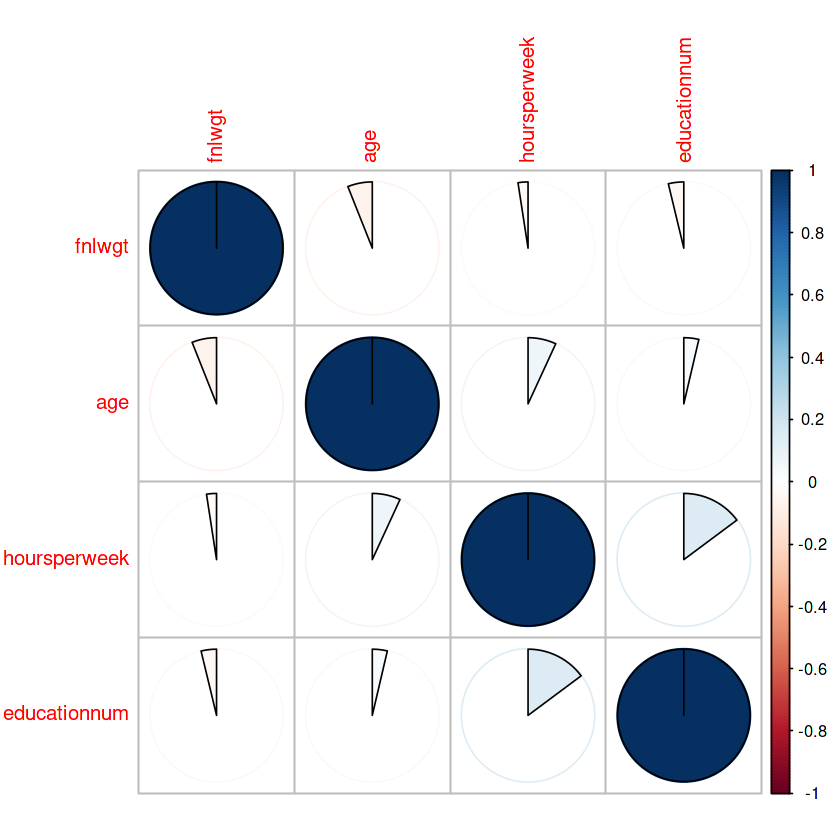

In [ ]:
library(corrplot)
correlat = cor(adult.cmplt.norm[c(1:4)])
corrplot(correlat, method = 'pie', order = 'AOE')
character(0)

    *All correlations <= 0.7, No high Correlations found*

    Fig-7: Correlation detection

From Fig-7, its evident that none of the predictors are highly correlated to each other. We now proceed to building the prediction model.

**4. Predictive data analytics**

In this section, we will discuss various approaches applied to model building, predictive power and their trade-offs.

**A. Creating the train and test dataset**

We now divide the data into 75% training set and 25% testing set. We also created a root mean square evaluation function for model testing.

In [ ]:
ratio = sample(1:nrow(adult.cmplt), size = 0.25*nrow(adult.cmplt))
test.data = adult.cmplt[ratio,] #Test dataset 25% of total
train.data = adult.cmplt[-ratio,] #Train dataset 75% of total
dim(train.data)
dim(test.data)

[1] 24421    15

[1] 8140   15

# **Fit a Logistic Regression Model**

In [ ]:
glm.fit = glm(income~., family=binomial(link='logit'),data = train.data)

Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”


This Warning: glm.fit: fitted probabilities numerically 0 or 1 occurred means that the data is possibly linearly separable. Let’s look at the summary for the model.

In [ ]:
summary(glm.fit)


Call:
glm(formula = income ~ ., family = binomial(link = "logit"), 
    data = train.data)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-5.2189  -0.4560  -0.1691  -0.0292   3.4508  

Coefficients: (1 not defined because of singularities)
                              Estimate Std. Error z value Pr(>|z|)    
(Intercept)                 -2.751e+01  1.783e+02  -0.154 0.877348    
fnlwgt                       6.680e-07  2.007e-07   3.329 0.000873 ***
capitalgain                  3.224e-04  1.219e-05  26.445  < 2e-16 ***
capitalloss                  5.816e-04  4.398e-05  13.225  < 2e-16 ***
age                          2.486e-02  1.947e-03  12.772  < 2e-16 ***
educationnum                 1.344e-01  1.334e-02  10.075  < 2e-16 ***
hoursperweek                 2.781e-02  1.881e-03  14.787  < 2e-16 ***
workclassFedGov              3.915e-01  2.078e-01   1.884 0.059562 .  
workclassLocGov             -2.758e-01  1.934e-01  -1.426 0.153941    
workclassNeverWorked        

Its evident that the significant predictors are age, workclassSelfEmpInc,fnlwgt,educationnum and maritalstatusmarried. As for the statistical significant variables, age and educationnum has the lowest p value suggesting a strong association with the response, income. The null deviance shows how well the response is predicted by the model with nothing but an intercept. Deviance is a measure of goodness of fit of a generalized linear model. it’s a measure of badness of fit–higher numbers indicate worse fit. The residual deviance shows how well the response is predicted by the model when the predictors are included. From your example, it can be seen that the residual deviance decreases by 12115 (27001-14886) when 15 predictors were added to it.(note: degrees of freedom = no. of observations – no. of predictors). This decrease in deviance is evidence of significant fit. If the deviance would have increased it would indicate a significant lack of fit. The AIC is 14895. The Akaike Information Criterion (AIC) provides a method for assessing the quality of your model through comparison of related models. It’s based on the Deviance, but penalizes you for making the model more complicated. Much like adjusted R-squared, it’s intent is to prevent you from including irrelevant predictors. However, unlike adjusted R-squared, the number itself is not meaningful. If you have more than one similar candidate models (where all of the variables of the simpler model occur in the more complex models), then you should select the model that has the smallest AIC. So AIC is useful for comparing models, but isn’t interpretable on its own.

We now create another logistic model that includes only the significant predictors.

In [ ]:
glm.fit1 = glm(income ~ age + workclass + educationnum + fnlwgt + maritalstatus, family=binomial(link='logit'),data = train.data)

Now we can run the *anova()* function on the improved model to analyze the table of deviance.

In [ ]:
anova(glm.fit, glm.fit1, test="Chisq")

,Resid. Df,Resid. Dev,Df,Deviance,Pr(>Chi)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,24376,14805.12,NA,NA,NA
2,24406,18402.80,-30,-3597.689,0


**Analysis of Deviance Table :**

**Model 1:** income ~ age + workclass + fnlwgt + education + educationnum + maritalstatus + occupation + relationship + race + sex + capitalgain + capitalloss + hoursperweek + nativecountry

**Model 2:** income ~ age + workclass + educationnum + fnlwgt + maritalstatus

By conducting the anova test, it performs the Chi-square test to compare glm.fit and glm.fit1 (i.e. it tests whether reduction in the residual sum of squares are statistically significant or not). The test shows that, Model 2 is statistically significant as the p value is less than 0.05. Therefore, the predictors, (age + workclass + educationnum + fnlwgt + maritalstatus) are relevant for the model.

We now test the logistic model on all predictors and make predictions on unseen data.

Warning message in stats::predict.lm(object, ...):
“prediction from a rank-deficient fit may be misleading”


       predicted
actual  FALSE TRUE
  <=50K  5913  266
  >50K    956 1005

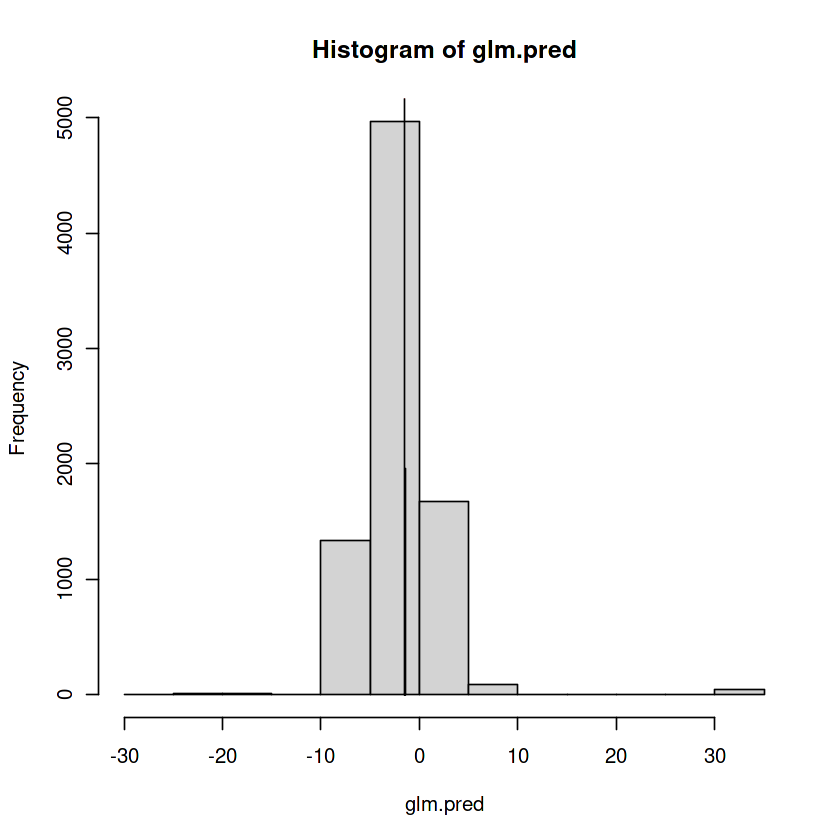

In [ ]:
set.seed(1234)
glm.pred = predict(glm.fit, test.data, type = "response")
hist(glm.pred, breaks=20)
hist(glm.pred[test.data$income], col="red", breaks=20, add=TRUE)
table(actual= test.data$income, predicted= glm.pred>0.5)

In [ ]:
#Interpreting Result
(5913+956)/8140

[1] 0.8438575

The classifier returns 84% accuracy when the model includes all predictors in it.

**5. Conclusion**

**In this study,** we aimed to predict a person’s income based on variables like habitat, education, marital status, age, race, sex and others. We found in exploring this particular dataset that, higher education is no guarantee to high income. This pattern could be attributed the uneven sample distribution.